In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.get_cmap('RdBu') # Use a built-in colormap

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとのサンプルデータをプロット
    for idx, cl in enumerate(np.unique(y)):
        # マーカーが 'x' (unfilled) の場合は edgecolor を指定しない (UserWarning 回避のため)
        scatter_kwargs = {
            'x': X[y == cl, 0],
            'y': X[y == cl, 1],
            'alpha': 0.8,
            'c': colors[idx],
            'marker': markers[idx],
            'label': 'Setosa (ヒオウギアヤメ)' if cl == -1 else 'Versicolor (ブルーフラッグ)'
        }
        if markers[idx] != 'x':
            scatter_kwargs['edgecolor'] = 'black'
            
        plt.scatter(**scatter_kwargs)

In [8]:
def main():
    # 1. データの読み込み
    # データセットにはヘッダーがないため、READMEに基づいて列名を手動で定義します
    column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
    try:
        df = pd.read_csv('iris_data.csv', header=None, names=column_names)
    except FileNotFoundError:
        print("Error: iris_data.csv not found.")
        return

    # 2. 前処理
    # SetosaとVersicolorのデータを抽出します
    target_classes = ['Iris-setosa', 'Iris-versicolor']
    df_filtered = df[df['class'].isin(target_classes)].copy()

    # クラス名を数値ラベルに変換します: Setosa -> -1, Versicolor -> 1
    # パーセプトロンは数値ラベルを必要とするためです
    df_filtered['label'] = df_filtered['class'].apply(lambda x: -1 if x == 'Iris-setosa' else 1)

    # 特徴量の選択: がく片の長さ (sepal_length) と がく片の幅 (sepal_width)
    X = df_filtered[['sepal_length', 'sepal_width']].values
    y = df_filtered['label'].values

    # 3. モデルの学習
    # 線形分離のためにパーセプトロンを使用します
    ppn = Perceptron(max_iter=100, eta0=0.1, random_state=1)
    ppn.fit(X, y)

    print(f"Model trained. Accuracy on training set: {ppn.score(X, y):.2f}")

    # 4. 可視化
    # 日本語フォントの設定
    plt.rcParams['font.family'] = 'MS Gothic'

    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('がく片の長さ [cm]')
    plt.ylabel('がく片の幅 [cm]')
    plt.legend(loc='upper left')
    plt.title('パーセプトロン - SetosaとVersicolorの線形分離')
    
    output_file = 'linear_separation_result.png'
    plt.savefig(output_file)
    print(f"Result saved to {output_file}")

Model trained. Accuracy on training set: 0.98
Result saved to linear_separation_result.png


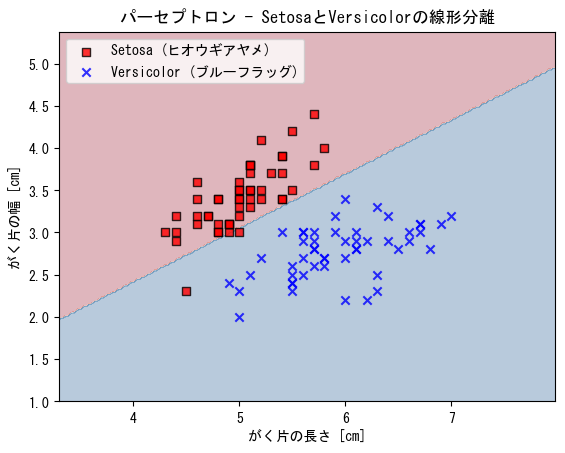

In [9]:
if __name__ == "__main__":
    main()